In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
import pandas as pd
from . import product_embedding

# sentences = ['how is the weather today', 'What is the current weather like today?']

product_embedding.get_embeddings()

In [ ]:
df = pd.read_csv('../data/all_products.csv')
print(df.dtypes)
print(df.head())


asin            object
title           object
description     object
price           object
images          object
features        object
rating         float64
dtype: object
         asin                                              title  \
0  B001FB5IMI  NIVEA Soft Moisturizing Creme 6.8 Ounce (Pack ...   
1  B001EHF954  Farouk PM7426 Chi Mini Flat Iron and Mini Pro ...   
2  B000NWDSAE  Neutrogena Oil-Free Acne Face Scrub, 2% Salicy...   
3  B00BEGEQKE      Sleek Makeup - Blush By 3 Palette (367- Lace)   
4  B008IH8SUQ  Best Choice Products Silver 19" Lockable Alumi...   

                                         description  price  \
0                                                NaN  26.99   
1                                                NaN    NaN   
2                                                NaN   6.78   
3  As one of the fastest growing brands on the hi...    NaN   
4                                                NaN    NaN   

                                     

Modelo

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU, Bidirectional,Embedding
from tensorflow.keras.callbacks import EarlyStopping

from joblib import dump


In [ ]:
df_index = df[['asin','title']]
df_index = df_index.reset_index()
df_index = df_index.set_index('asin')
df_index.head()

,index,title
asin,,
B001FB5IMI,0,NIVEA Soft Moisturizing Creme 6.8 Ounce (Pack ...
B001EHF954,1,Farouk PM7426 Chi Mini Flat Iron and Mini Pro ...
B000NWDSAE,2,"Neutrogena Oil-Free Acne Face Scrub, 2% Salicy..."
B00BEGEQKE,3,Sleek Makeup - Blush By 3 Palette (367- Lace)
B008IH8SUQ,4,"Best Choice Products Silver 19"" Lockable Alumi..."


In [ ]:
ppoints = dict_emb.T
# ppoints = ppoints.iloc[1:]
ppoints.head()

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
B001FB5IMI,-0.030045,-0.072545,-0.201427,-0.203174,-0.461608,0.451293,-0.077632,-0.168426,-0.032214,0.227952,...,0.114269,0.085792,-0.062446,-0.137065,0.259027,0.260877,0.011004,-0.093349,0.461687,0.175475
B001EHF954,-0.142861,0.022309,-0.161547,0.233514,0.006513,0.054056,0.027264,0.155129,-0.221963,-0.049751,...,0.042615,-0.036126,0.161892,0.175229,0.209768,-0.055864,-0.003680,-0.238159,-0.327050,0.562879
B000NWDSAE,-0.137577,-0.341818,0.293606,-0.095868,-0.689856,0.517329,0.057832,0.138472,0.353597,-0.214162,...,0.017717,-0.074848,-0.209198,-0.247053,-0.151492,0.068336,0.380122,0.308564,0.039649,-0.317830
B00BEGEQKE,-0.016326,0.047720,0.114472,-0.067890,-0.235242,0.121171,-0.057844,0.244118,-0.017317,-0.349500,...,0.178242,0.236212,0.137974,-0.445084,-0.190013,0.141144,0.388077,-0.110387,0.045206,0.014342
B008IH8SUQ,0.044227,0.066916,0.088200,0.173404,-0.024400,0.242779,0.159135,0.074908,0.263791,-0.325299,...,0.028295,0.235203,-0.136714,-0.192697,-0.020701,-0.038676,0.320738,-0.300832,0.096143,0.615216


In [ ]:
_knn_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

# Entrenar el modelo con los vectores de embeddings
_knn_model.fit(ppoints)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [ ]:
dump(knn, 'modelo_knn.joblib')

['modelo_knn.joblib']

In [ ]:
d, i = _knn_model.kneighbors([ppoints.iloc[0]])
print(d)
print(i)

[[0.         2.408552   3.12027413 3.17154506 3.30696041 3.31634629
  3.31634647 3.34019663 3.34019663 3.34019663]]
[[    0  3080  3713  8103   213  3654  2965 23763 20460 23786]]


In [54]:
seqs = pd.read_csv('all_sequences_3.csv')
print(seqs.shape)
seqs.head()

(119742, 2)


,Sequence,Length
0,"['B004MKEMPI', 'B005HKST1U', 'B001KYRVSO']",3
1,"['B005HKST1U', 'B001KYRVSO', 'B0055MYJ0U']",3
2,"['B0071H61FS', 'B005FYJB92', 'B003NEZ0R8']",3
3,"['B005FYJB92', 'B003NEZ0R8', 'B000NJE14E']",3
4,"['B00AO6UKQO', 'B00B0RTA30', 'B00BM4GG9C']",3


In [ ]:
ppoints.index

Index(['B001FB5IMI', 'B001EHF954', 'B000NWDSAE', 'B00BEGEQKE', 'B008IH8SUQ',
       'B002G789OY', 'B006428HO4', 'B000PSTJ4K', 'B00DI7HW2Q', 'B000PILH9K',
       ...
       'B000POX044', 'B004D248ZE', 'B001R1E2FK', 'B001KYVRSY', 'B000O7BA9Y',
       'B00164KD5Q', 'B0015GEMSE', 'B007XN7MSK', 'B003E6VET8', 'B000C1Z5UC'],
      dtype='object', length=23838)

In [56]:
import numpy as np

def padding(embeddings: list, n: int = 3):
    embedding_dim = len(embeddings[0])
    padded_embeddings = np.zeros((n, embedding_dim))
    seq_len = min(len(embeddings), n)
    padded_embeddings[n-seq_len:] = embeddings[-seq_len:]
    return padded_embeddings



# print(raw_data[0][0][:5])
seqs = seqs['Sequence']
seqs = [eval(x) for x in seqs]

raw_data = [[np.array(ppoints.loc[p]) for p in seq if p in ppoints.index] for seq in seqs]
print(raw_data[0][0][:5])
# raw_data = [padding(seq) for seq in raw_data if len(seq) > 1]
# print(raw_data[0])


[-0.07263367  0.31538075  0.09775469  0.24445857  0.1439517 ]


In [57]:
from sklearn.model_selection import train_test_split

X = np.array([seq[:2] for seq in raw_data])
y = np.array([seq[2] for seq in raw_data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

print(len(X_train))
print(len(X_train[0]))
print(len(X_train[0][0]))
print()
print(len(y_train))
print(len(y_train[0]))
print(y_train[0][:5])

121312
2
312

121312
312
[-0.28850389 -0.52450329 -0.47742662 -0.10441158 -0.65478277]


In [ ]:
df_index.index[df_index['index'] == 3][0]

str

In [ ]:
def knn_accuracy(y_true, y_pred):
    correct_predictions = 0
    print(len(y_true))
    total_predictions = len(y_true)

    for i in range(total_predictions):
        if i%1000 == 0:
          print(i)
        # Obtener los embeddings predichos
        rnn_prediction = y_pred[i]
        rnn_true = y_true[i]

        # Encontrar los 10 vectores más cercanos con el modelo KNN
        _, knn_prediction = _knn_model.kneighbors([y_pred[i]])
        _, knn_true = _knn_model.kneighbors([y_true[i]])

        # Obtener los códigos de los productos predichos
        token = df_index.index[df_index['index'] == knn_true[0][0]][0]
        codes = [df_index.index[df_index['index'] == index][0] for index in knn_prediction[0]]

        # Verificar si la respuesta esperada está entre los 10 vectores más cercanos
        if token in codes:
            correct_predictions += 1

    # Calcular la accuracy
    accuracy = correct_predictions / total_predictions
    return accuracy

# Convertir la función a un tensor para usarla como métrica en Keras
knn_accuracy_metric = tf.keras.metrics.Mean(name='knn_accuracy', dtype=tf.float32)

def knn_accuracy_update(y_true, y_pred):
    accuracy = knn_accuracy(y_true, y_pred)
    knn_accuracy_metric.update_state(accuracy)
    return knn_accuracy_metric.result()

# Registrar la métrica personalizada
tf.keras.utils.get_custom_objects()['knn_accuracy'] = knn_accuracy_update

In [ ]:

def cosine_distance_loss(y_true, y_pred):
    # Normalizar los vectores
    y_true = tf.nn.l2_normalize(y_true, axis=-1)
    y_pred = tf.nn.l2_normalize(y_pred, axis=-1)

    # Calcular la distancia coseno
    cosine_similarity = tf.reduce_sum(tf.multiply(y_true, y_pred), axis=-1)
    cosine_distance = 1 - cosine_similarity

    return tf.reduce_mean(cosine_distance)

# Registrar la función de pérdida personalizada
tf.keras.utils.get_custom_objects()['cosine_distance_loss'] = cosine_distance_loss

In [95]:
model = Sequential([
    GRU(312, return_sequences=True, input_shape=(2, 312), dropout=0.2),  # Ejemplo con secuencias de longitud 10
    LSTM(312, return_sequences=True, dropout=0.2),  # Ejemplo con secuencias de longitud 10
    GRU(312),
    Dense(312, activation='linear')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=[cosine_distance_loss])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
history = model.fit(X_train, y_train, epochs=5, batch_size=20, validation_split=0.2)

Epoch 1/5
3832/3832 ━━━━━━━━━━━━━━━━━━━━ 207s 52ms/step - cosine_distance_loss: 0.6288 - loss: 0.0537 - val_cosine_distance_loss: 0.6177 - val_loss: 0.0532
Epoch 2/5
3832/3832 ━━━━━━━━━━━━━━━━━━━━ 199s 51ms/step - cosine_distance_loss: 0.6192 - loss: 0.0533 - val_cosine_distance_loss: 0.6157 - val_loss: 0.0530
Epoch 3/5
3832/3832 ━━━━━━━━━━━━━━━━━━━━ 199s 51ms/step - cosine_distance_loss: 0.6152 - loss: 0.0530 - val_cosine_distance_loss: 0.6146 - val_loss: 0.0530
Epoch 4/5
3832/3832 ━━━━━━━━━━━━━━━━━━━━ 204s 51ms/step - cosine_distance_loss: 0.6129 - loss: 0.0529 - val_cosine_distance_loss: 0.6140 - val_loss: 0.0529
Epoch 5/5
3832/3832 ━━━━━━━━━━━━━━━━━━━━ 200s 51ms/step - cosine_distance_loss: 0.6106 - loss: 0.0527 - val_cosine_distance_loss: 0.6130 - val_loss: 0.0529


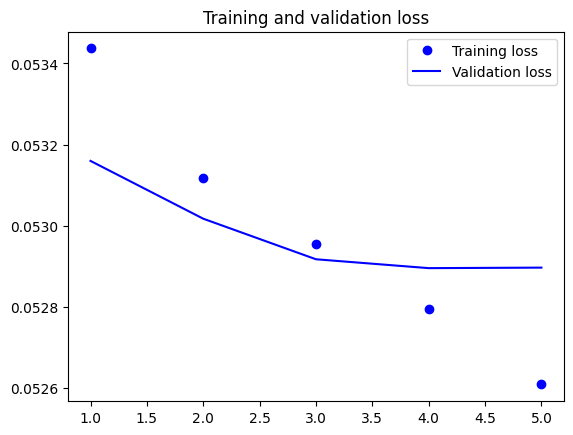

In [92]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [93]:
predd= model.predict(X_test)
print(knn_accuracy(predd,y_test ))

749/749 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step
23949
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
0.019792058123512465


In [86]:
# Evaluar el modelo con datos de prueba
test_loss, test_cosin = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test cosin: {test_cosin}, Test MSE: {test_mse}')

749/749 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - cosine_distance_loss: 0.6173 - loss: 0.0530
Test Loss: 0.052862219512462616, Test cosin: 0.6150392889976501, Test MSE: 0.05282426252961159


Sitio del Modelo de lenguajes usado para crear los embeddings https://huggingface.co/jinaai/jina-embedding-t-en-v1

1 -  GRU(312) LSTM(312) Test Loss: 0.02641725353896618, Test cosin: 0.6141833662986755, Test MSE: 0.05283556133508682 0.019332748757776942

In [ ]:
print(X_train.shape)

(38746, 2, 312)


In [ ]:
model.save('all_beauty-embedding_rnn_cosin.keras')

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 2, 312)              │         780,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 312)                 │         780,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 312)                 │          97,656 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,972,970 (18.97 MB)

 Trainable params: 1,657,656 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,315,314 (12.65 MB)